In [2]:
%pylab inline
import pickle
plt.style.use('seaborn-darkgrid')

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Get pickeled arrays
PATH_TO_FILES = "final_params_may2/"

xpr_dict = pickle.load(open(PATH_TO_FILES+"xpr_dict.pickled", "rb"))
xpo_dict = pickle.load(open(PATH_TO_FILES+"xpo_dict.pickled", "rb"))
pr_cross_cov_state = pickle.load(open(PATH_TO_FILES+"pr_cross_cov_state.pickled", "rb"))

dict_en = pickle.load(open(PATH_TO_FILES+"dict_en.pickled", "rb"))
xpo_dict_param = pickle.load(open(PATH_TO_FILES+"xpo_dict_param.pickled", "rb"))
pr_cross_cov_param = pickle.load(open(PATH_TO_FILES+"pr_cross_cov_param.pickled", "rb"))


y_obs_perturbed = pickle.load(open(PATH_TO_FILES+"y_obs_perturbed.pickled", "rb"))
y_obs = pickle.load(open(PATH_TO_FILES+"yobs.pickled", "rb"))

innovation_arr = pickle.load(open(PATH_TO_FILES+"innovation_arr.pickled", "rb"))

ValueError: insecure string pickle

In [8]:
H = pickle.load(open(PATH_TO_FILES+"H.pickled", "rb"))
# print pr_cross_cov_state.shape
print H.shape
#print states_mean[0,:].size
# print dict_en.shape

(90, 45012)


# State Plot

(90, 15, 20)


/Users/williamcook/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt


Text(0,0.5,u'innovation (mm)')

/Users/williamcook/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


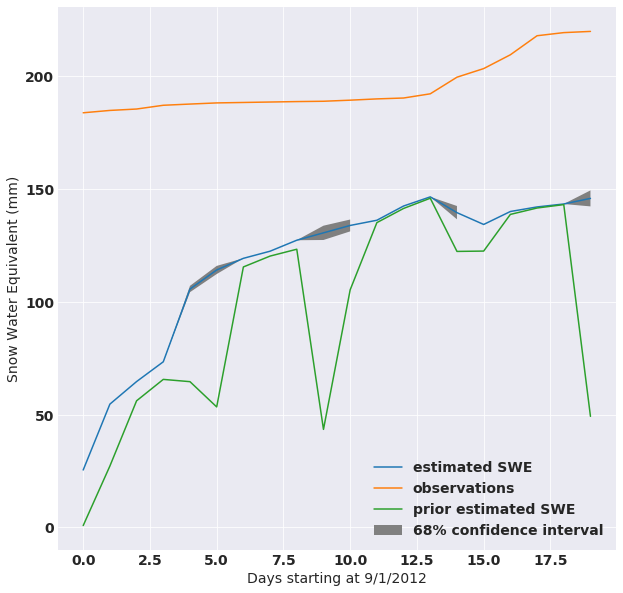

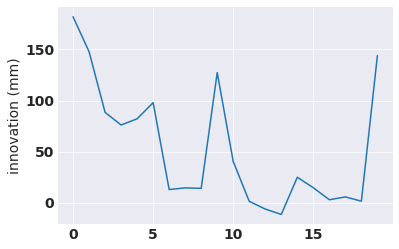

In [5]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

pre_states_mean = np.mean(xpr_dict, axis=0)
states_mean = np.mean(xpo_dict, axis=0)
predict_unc = H.T.dot(pr_cross_cov_state.diagonal().T)

innovation = innovation_arr

# est_vel = states[0]
# est_sed = states[1]

# var_vel = predict_unc[0]
# var_sed = predict_unc[1]

plt.figure(figsize=(10,10))
plt.plot()
plt.plot(np.mean(states_mean, axis=0), label='estimated SWE')
plt.plot(np.mean(y_obs, axis=0), label='observations')
plt.fill_between(np.arange(states_mean[0,:].size), np.mean(states_mean, axis=0)+np.sqrt(np.mean(predict_unc, axis=0)), np.mean(states_mean, axis=0)-np.sqrt(np.mean(predict_unc, axis=0)), 
                 facecolor='grey', label="68% confidence interval")
plt.plot(np.mean(pre_states_mean, axis=0), label='prior estimated SWE')
plt.legend()
plt.xlabel('Days starting at 9/1/2012')
plt.ylabel('Snow Water Equivalent (mm)')

print innovation_arr.shape
plt.figure()
plt.plot(np.mean(np.mean(innovation_arr,axis=0), axis=0))
plt.ylabel('innovation (mm)')


Text(0,0.5,u'Snow Water Equivalent (mm)')

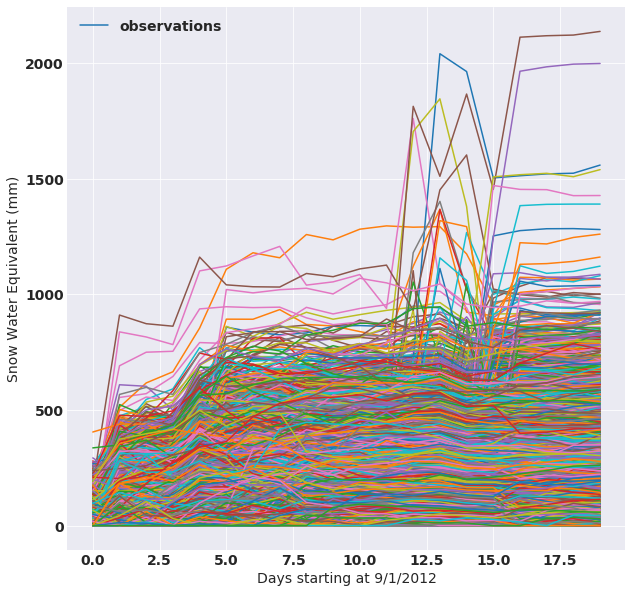

In [6]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}



matplotlib.rc('font', **font)

plt.figure(figsize=(10,10))
plt.plot()

plt.plot(np.mean(y_obs, axis=0), label='observations')

for i in range(states_mean.shape[0]):
    plt.plot(states_mean[i,:])
    
plt.legend()
plt.xlabel('Days starting at 9/1/2012')
plt.ylabel('Snow Water Equivalent (mm)')

# DDF plots

/Users/williamcook/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


Text(0,0.5,u'DDF')

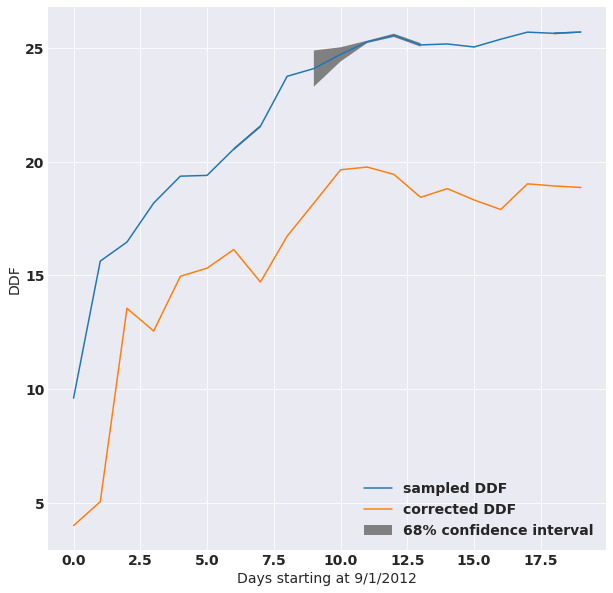

In [7]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

pre_states_mean = np.mean(dict_en, axis=0)[:,1:]
states_mean = np.mean(xpo_dict_param, axis=0)[:,1:]
predict_unc = pr_cross_cov_param.diagonal().T

plt.figure(figsize=(10,10))
plt.plot()
plt.plot(np.mean(states_mean, axis=0), label='sampled DDF')
plt.fill_between(np.arange(states_mean[0,:].size), np.mean(states_mean, axis=0)+np.sqrt(np.mean(predict_unc, axis=0)), np.mean(states_mean, axis=0)-np.sqrt(np.mean(predict_unc, axis=0)), 
                 facecolor='grey', label="68% confidence interval")
plt.plot(np.mean(pre_states_mean, axis=0), label='corrected DDF')
plt.legend()
plt.xlabel('Days starting at 9/1/2012')
plt.ylabel('DDF')

In [4]:
# Get pickeled arrays
PATH_TO_FILES = "final_params_may2/"

xpo_dict = pickle.load(open(PATH_TO_FILES+"xpo_dict.pickled", "rb"))

xpo_dict_param = pickle.load(open(PATH_TO_FILES+"xpo_dict_param.pickled", "rb"))

y_obs_perturbed = pickle.load(open(PATH_TO_FILES+"y_obs_perturbed.pickled", "rb"))
y_obs = pickle.load(open(PATH_TO_FILES+"yobs.pickled", "rb"))

/Users/williamcook/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


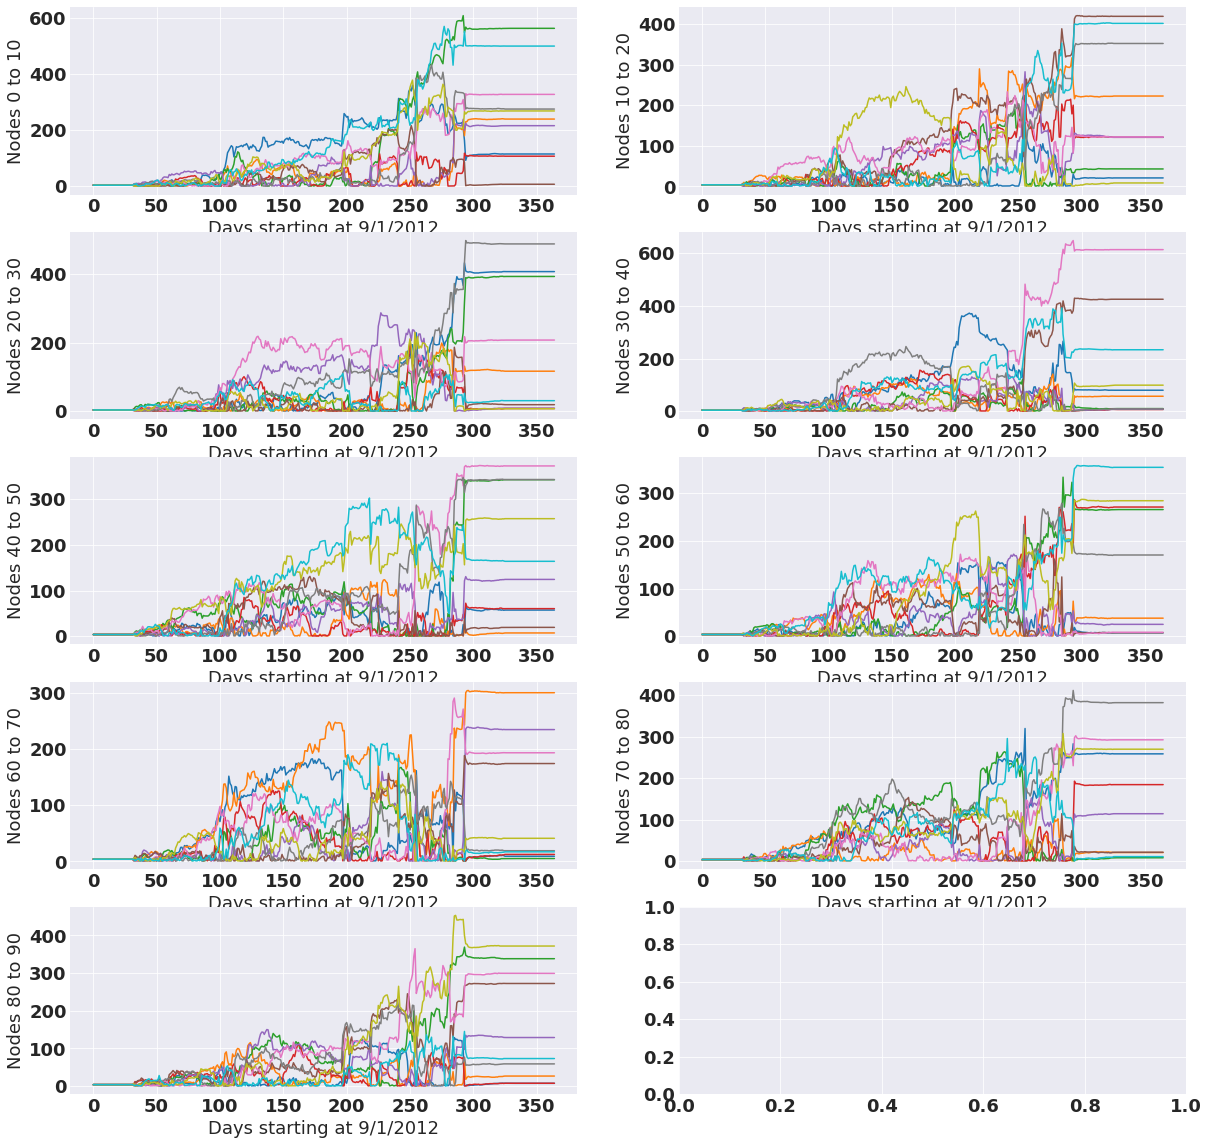

In [11]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
pre_states_mean = np.mean(xpo_dict_param, axis=0)[:,1:]
pre_states_mean_H = pre_states_mean
matplotlib.rc('font', **font)

label = "DDF Nodes "

f, ax = plt.subplots(5,2,figsize=(20,20))

for i in range(pre_states_mean_H.shape[0]/10):
    begin = i * 10
    end = i * 10 + 10

    ax.flat[i].plot(pre_states_mean_H[begin:end,:].T) 
    ax.flat[i].set_ylabel('Nodes ' + str(begin) + ' to ' + str(end))
    ax.flat[i].set_xlabel('Days starting at 9/1/2012')

f.savefig("DFFnodes")

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

pre_states_mean = np.mean(xpr_dict, axis=0)
states_mean = np.mean(xpo_dict, axis=0)
predict_unc = H.T.dot(pr_cross_cov_state.diagonal().T)

innovation = innovation_arr

# est_vel = states[0]
# est_sed = states[1]

# var_vel = predict_unc[0]
# var_sed = predict_unc[1]

plt.figure(figsize=(10,10))
plt.plot()
plt.plot(np.mean(states_mean, axis=0), label='estimated SWE')
plt.plot(np.mean(y_obs, axis=0), label='observations')
plt.fill_between(np.arange(states_mean[0,:].size), np.mean(states_mean, axis=0)+np.sqrt(np.mean(predict_unc, axis=0)), np.mean(states_mean, axis=0)-np.sqrt(np.mean(predict_unc, axis=0)), 
                 facecolor='grey', label="68% confidence interval")
plt.plot(np.mean(pre_states_mean, axis=0), label='prior estimated SWE')
plt.legend()
plt.xlabel('Days starting at 9/1/2012')
plt.ylabel('Snow Water Equivalent (mm)')

print innovation_arr.shape
plt.figure()
plt.plot(np.mean(np.mean(innovation_arr,axis=0), axis=0))
plt.ylabel('innovation (mm)')

